In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
#NEEDS TO READ FROM SQL

df = pd.read_csv("C:/Users/cdj3e/vu_bootcamp/Project_4/Resources/heart_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [5]:
df = df.rename(columns={"age": "Age", "sex": "Sex", "cp": "Chest Pain Type", "trestbps": "Resting BP", "chol": "Cholesterol", "fbs": "Fasting Blood Sugar", "restecg": "Resting ECG", "thalach": "Max Heart Rate", "exang": "Exercise Induced Angina", "oldpeak": "OldPeak", "slope": "ST Slope", "num": "Heart Disease"})

df.head()

,Age,Sex,Chest Pain Type,Resting BP,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,OldPeak,ST Slope,Heart Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


Data Exploration

In [6]:
#correlation

px.imshow(df.corr(),title="Heart Disease Prediction Correlation")

In [7]:
#histogram correlation

fig=px.histogram(df, 
                 x="Heart Disease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Heart Disease by Sex",
                 barmode="group")
fig.show()

In [8]:
#histogram distribution

fig=px.histogram(df,
                 x="Age",
                 hover_data=df.columns,
                 title="Distribution of Age")
fig.show()

[]

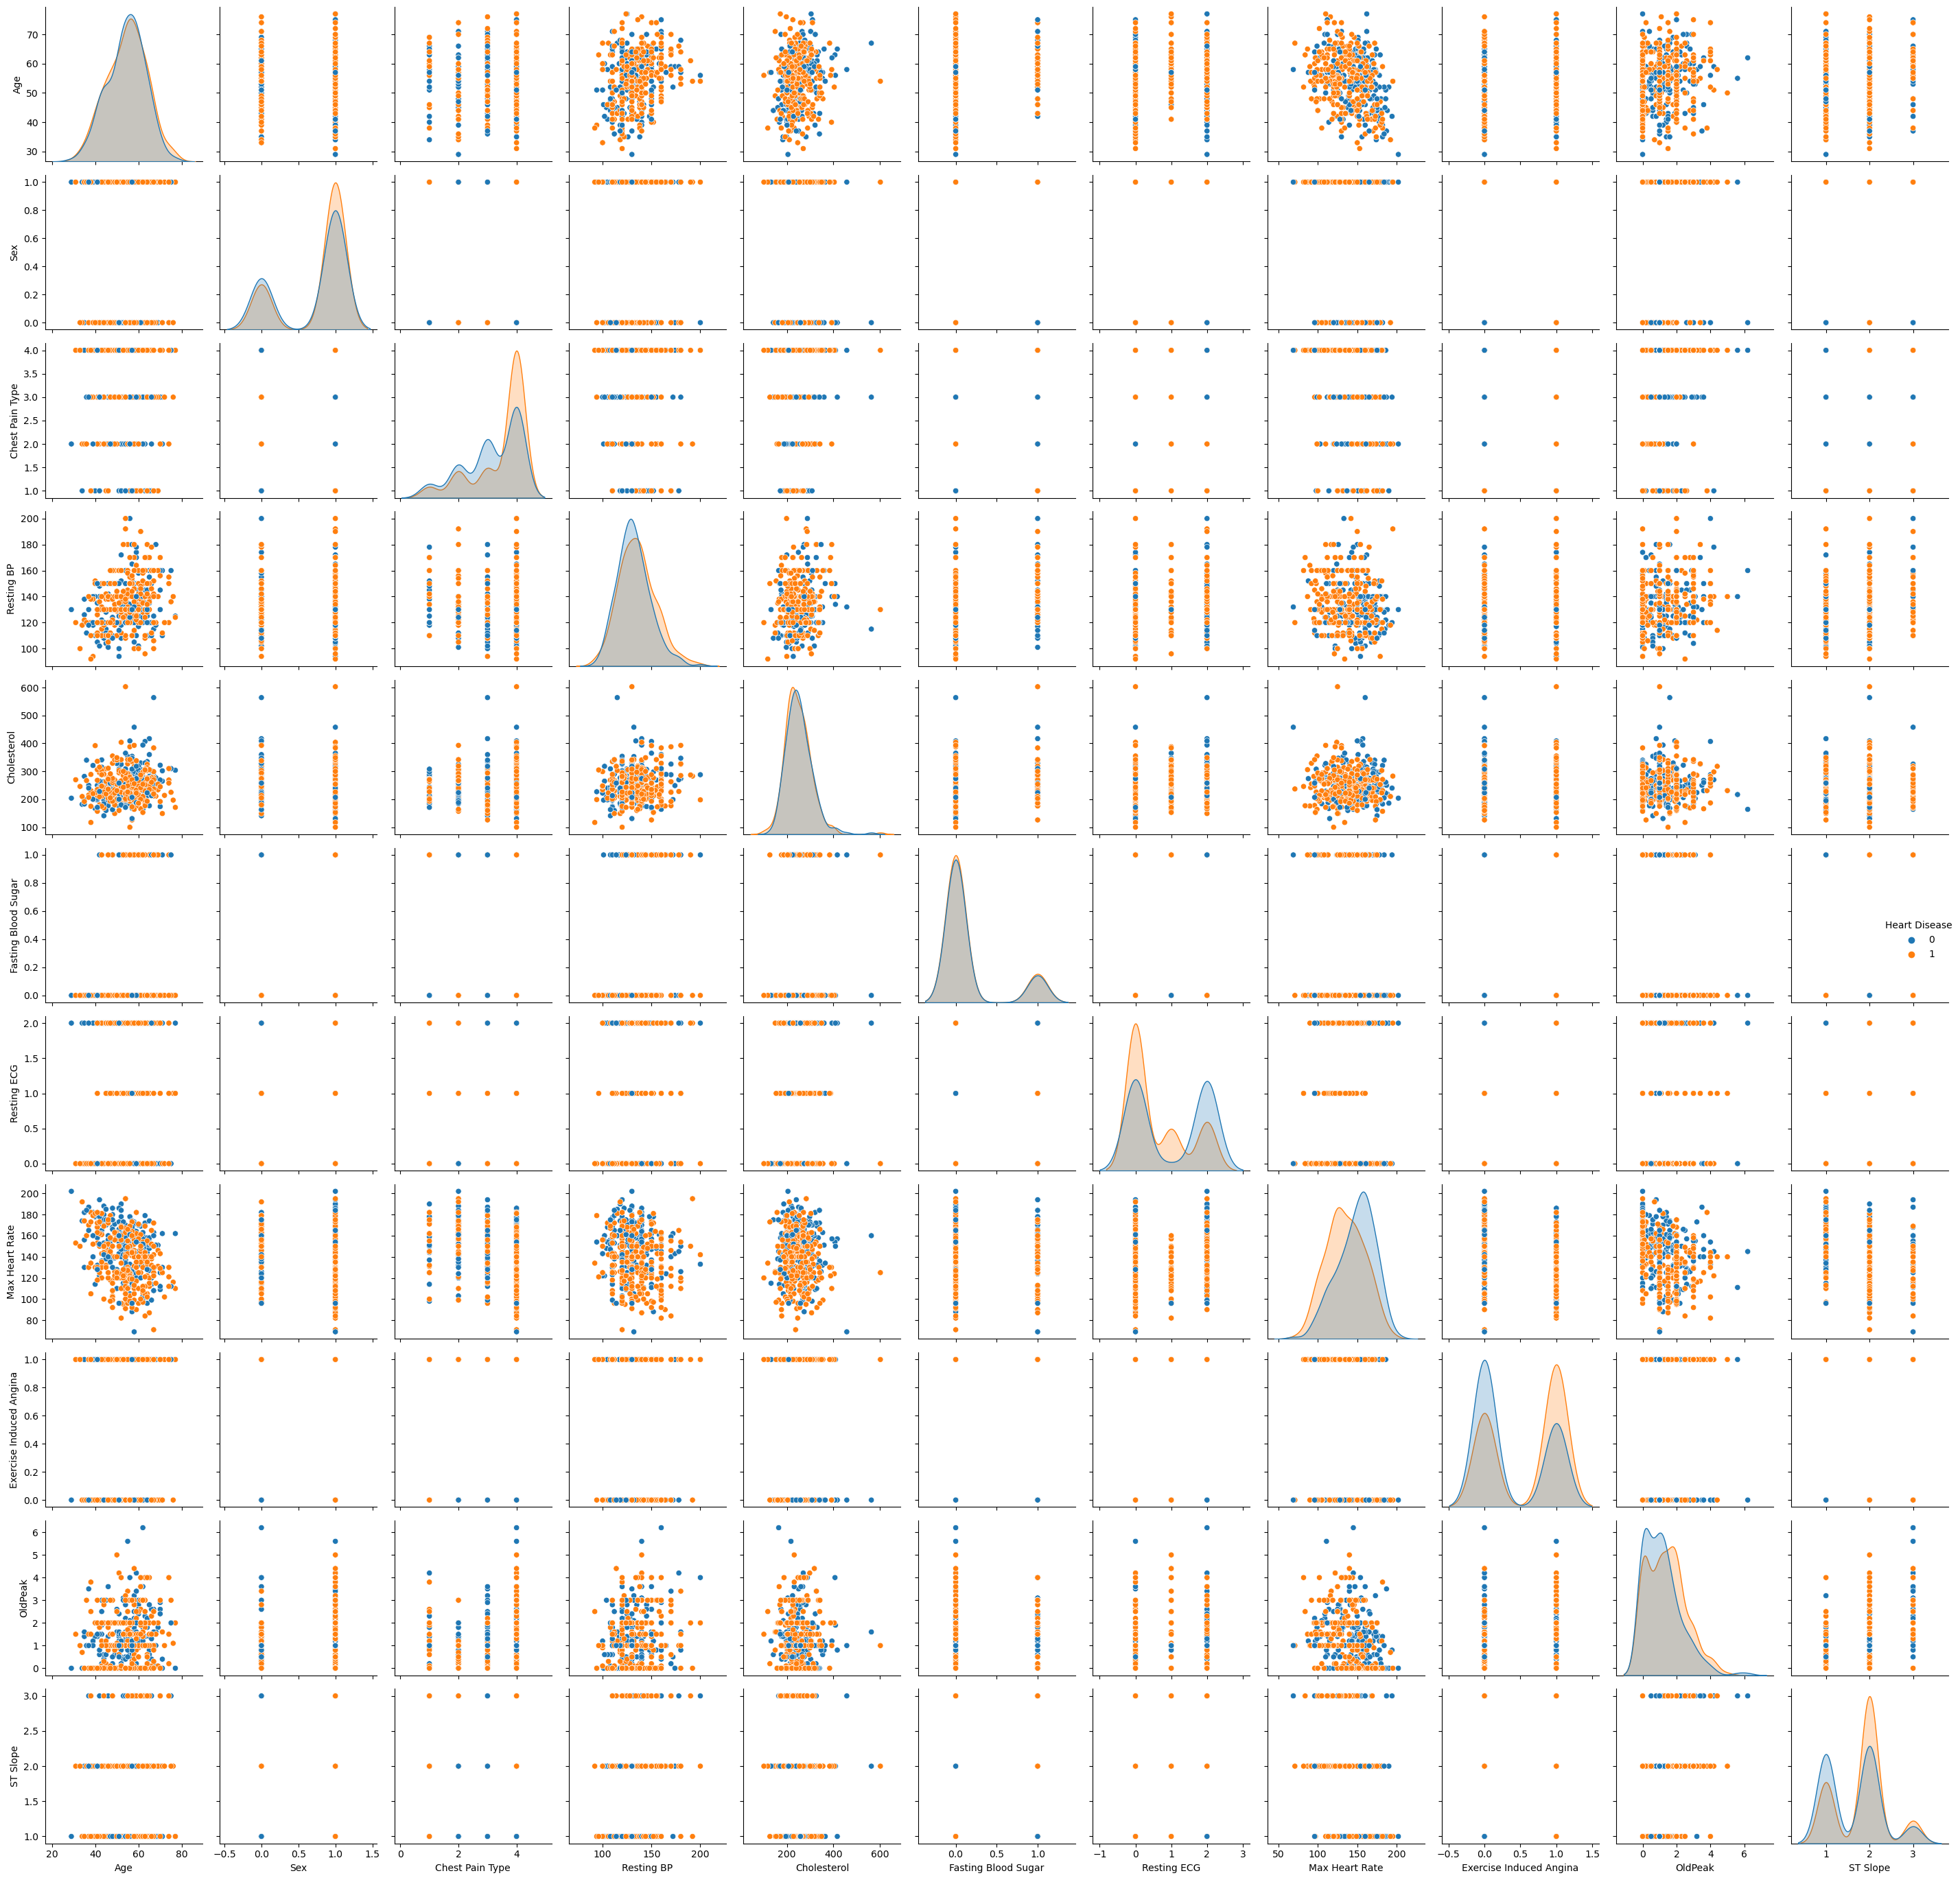

In [9]:
#pairplot

sns.pairplot(df,hue="Heart Disease")
plt.tight_layout()
plt.plot()

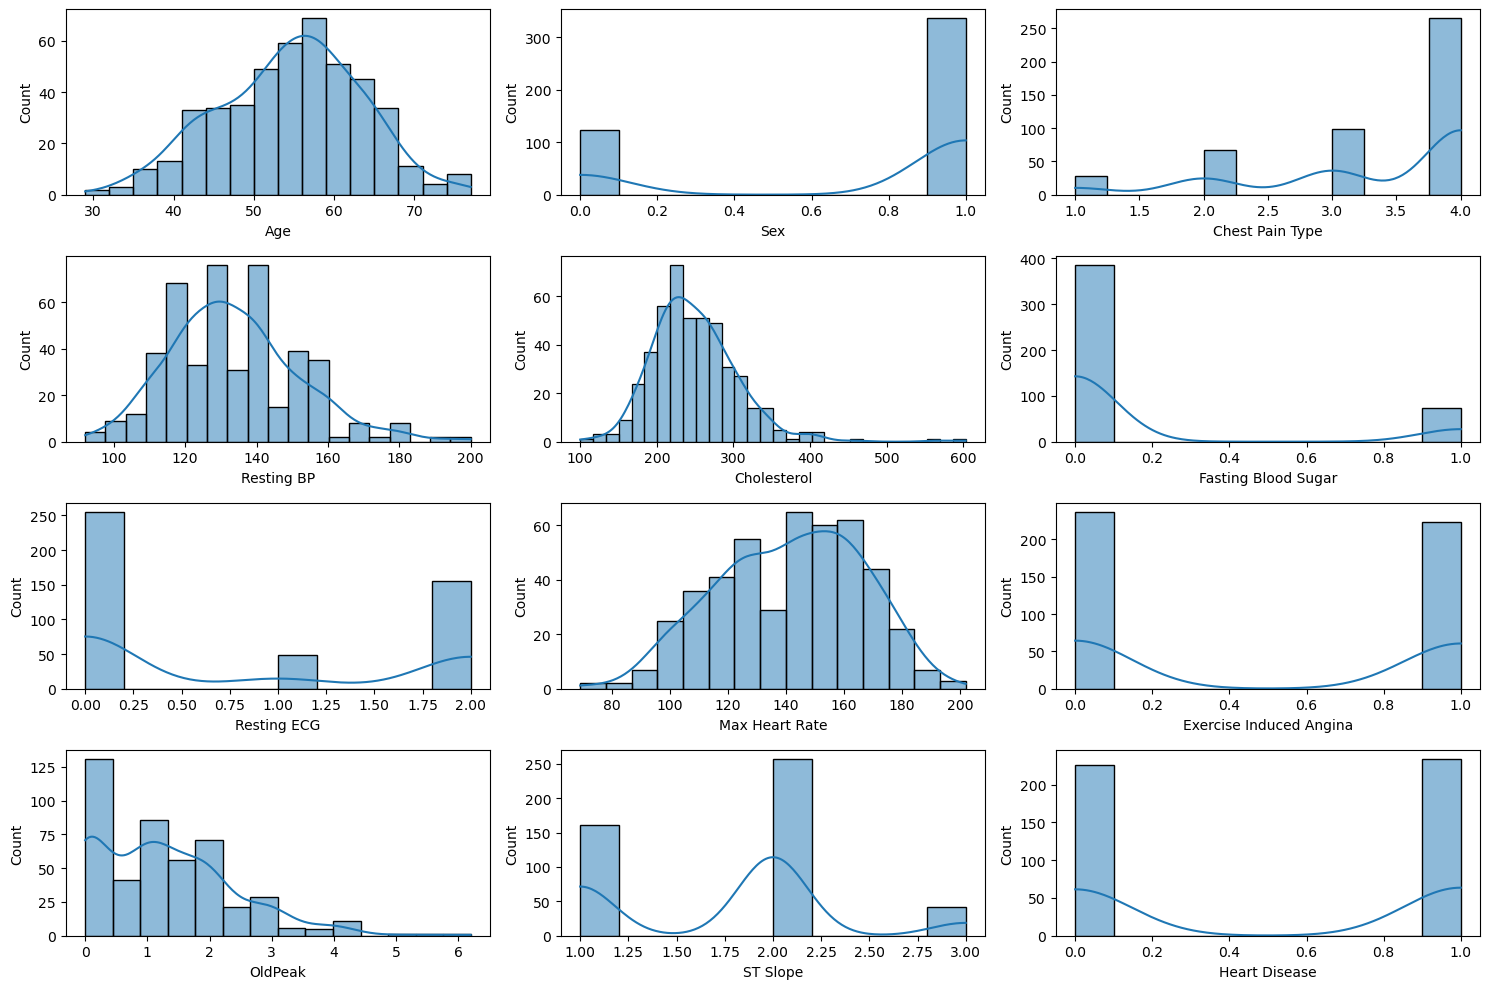

In [10]:
#distribution shape by kernel density estimate

plt.figure(figsize=(15,10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

In [11]:
#boxplot distribution

fig = px.box(df,y="Resting BP",x="Heart Disease",title=f"Resting BP Distribution by FBS",color="Sex")
fig.show()

Loop to determine best models

In [12]:
y = df['Heart Disease']
X = df.drop(columns='Heart Disease')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(345, 11)

In [51]:
models={"Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "Naive Bayers": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}

In [52]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

In [53]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit

    y_prediction=model.predict(X_test)

In [54]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_prediction=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_prediction)

    print(str(list(models.keys())[i])+" Score = ", (accuracy)*100)

Logistic Regression Score =  56.52173913043478
SVM Score =  58.69565217391305
Naive Bayers Score =  60.86956521739131
K-Nearest Neighbors Score =  60.86956521739131
Decision Tree Classifier Score =  43.47826086956522
Random Forest Classifier Score =  56.52173913043478


Varieties of Scaling

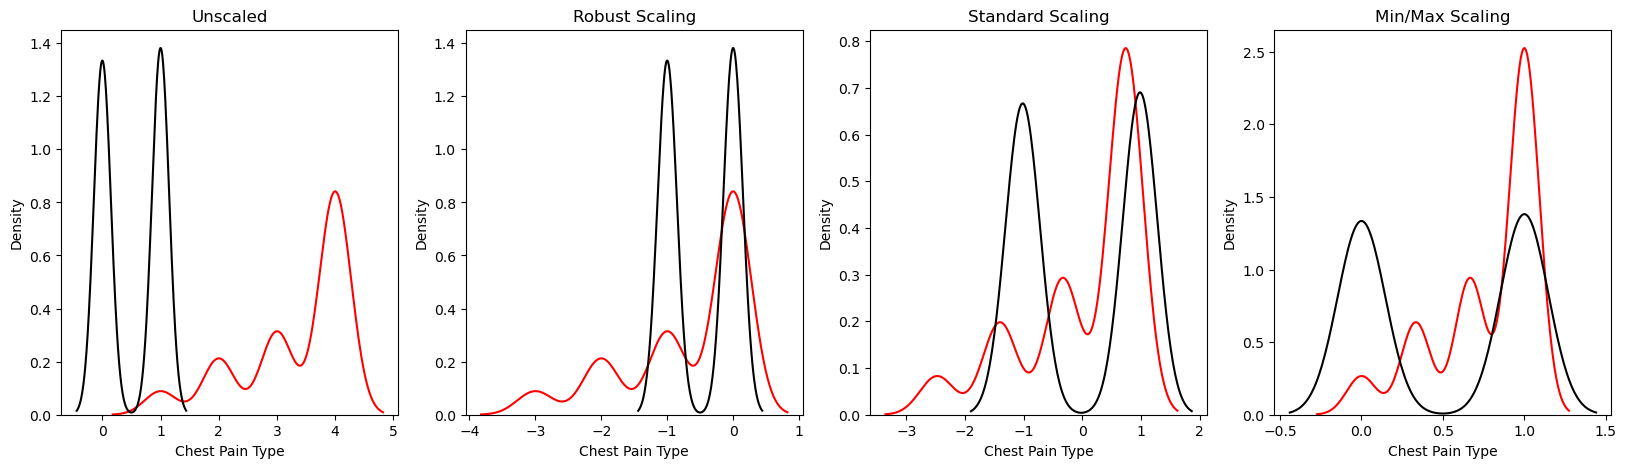

In [19]:
scaler = preprocessing.RobustScaler()
robust_scaling_df = scaler.fit_transform(df)
robust_scaling_df = pd.DataFrame(robust_scaling_df, columns =['Age', 'Sex', 'Chest Pain Type', 'Resting BP', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate', 'Exercise Induced Angina', 'OldPeak', 'ST Slope', 'Heart Disease'])
 
scaler = preprocessing.StandardScaler()
standard_scaling_df = scaler.fit_transform(df)
standard_scaling_df = pd.DataFrame(standard_scaling_df, columns =['Age', 'Sex', 'Chest Pain Type', 'Resting BP', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate', 'Exercise Induced Angina', 'OldPeak', 'ST Slope', 'Heart Disease'])
 
scaler = preprocessing.MinMaxScaler()
minmax_scaling_df = scaler.fit_transform(df)
minmax_scaling_df = pd.DataFrame(minmax_scaling_df, columns =['Age', 'Sex', 'Chest Pain Type', 'Resting BP', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate', 'Exercise Induced Angina', 'OldPeak', 'ST Slope', 'Heart Disease'])

fig, (unscaled, robust, standard, minmax) = plt.subplots(ncols = 4, figsize =(20, 5))

unscaled.set_title('Unscaled')
sns.kdeplot(df['Chest Pain Type'], ax = unscaled, color ='red')
sns.kdeplot(df['Heart Disease'], ax = unscaled, color ='black')

robust.set_title('Robust Scaling')
sns.kdeplot(robust_scaling_df['Chest Pain Type'], ax = robust, color ='red')
sns.kdeplot(robust_scaling_df['Heart Disease'], ax = robust, color ='black')

standard.set_title('Standard Scaling')
sns.kdeplot(standard_scaling_df['Chest Pain Type'], ax = standard, color ='red')
sns.kdeplot(standard_scaling_df['Heart Disease'], ax = standard, color ='black')

minmax.set_title('Min/Max Scaling')
sns.kdeplot(minmax_scaling_df['Chest Pain Type'], ax = minmax, color ='red')
sns.kdeplot(minmax_scaling_df['Heart Disease'], ax = minmax, color ='black')

plt.show()


Non-Tree Based Algorithms

In [20]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [21]:
df_new=pd.get_dummies(df,columns=string_col,drop_first=False)
df_new.head()

,Age,Sex,Chest Pain Type,Resting BP,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,OldPeak,ST Slope,Heart Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [22]:
target="Heart Disease"
y=df_new[target].values

In [23]:
columns = df_new.columns.to_list()
columns.remove(target)

In [24]:
#K-Fold Validation

k_fold = StratifiedKFold(n_splits=10)
for fold , (train_index, test_index) in enumerate(k_fold.split(X=df_new, y=y)):
    X_train=df_new.loc[train_index, columns]
    y_train=df_new.loc[train_index, target]
    
    X_test=df_new.loc[test_index, columns]
    y_test=df_new.loc[test_index, target]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
# Logistic Regression using K-Fold Validation

logistic_regression_accuracy = []
accuracy_log = []

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_prediction=logistic_regression.predict(X_test)

logistic_regression_accuracy = roc_auc_score(y_test, y_prediction)
accuracy_log.append(logistic_regression.score(X_test, y_test))

print(f"Logistic Regression Accuracy: ", (logistic_regression_accuracy)*100)



Logistic Regression Accuracy:  56.060606060606055


In [26]:
# naive bayes

NB_accuracy=[]
NB_accuracy_log=[]

naive_bayers=GaussianNB()
naive_bayers.fit(X_train, y_train)
y_prediction=naive_bayers.predict(X_test)

NB_accuracy = roc_auc_score(y_test, y_prediction)
NB_accuracy_log.append(naive_bayers.score(X_test, y_test))

print(f"Naive Bayers Accuracy: ", (NB_accuracy)*100)

Naive Bayers Accuracy:  60.22727272727273


In [27]:
# support vector machine linear kernel

linear_SVC_accuracy=[]
linear_SVC_accuracy_log=[]
    
svc_linear=SVC(kernel="linear")
svc_linear.fit(X_train,y_train)
y_prediction=svc_linear.predict(X_test)

linear_SVC_accuracy = roc_auc_score(y_test, y_prediction)
linear_SVC_accuracy_log.append(svc_linear.score(X_test, y_test))

print(f"SVM (Linear Kernel) Accuracy: ", (linear_SVC_accuracy)*100)

SVM (Linear Kernel) Accuracy:  56.060606060606055


In [28]:
# support vector machine sigmoid kernel

sigmoid_SVC_accuracy=[]
sigmoid_SVC_accuracy_log=[]
    
svc_sigmoid=SVC(kernel="sigmoid")
svc_sigmoid.fit(X_train,y_train)
y_prediction=svc_sigmoid.predict(X_test)

sigmoid_SVC_accuracy = roc_auc_score(y_test, y_prediction)
sigmoid_SVC_accuracy_log.append(svc_sigmoid.score(X_test, y_test))

print(f"SVM (Sigmoid Kernel) Accuracy: ", (sigmoid_SVC_accuracy)*100)

SVM (Sigmoid Kernel) Accuracy:  35.03787878787879


In [29]:
# support vector machine rbf kernel

rbf_SVC_accuracy=[]
rbf_SVC_accuracy_log=[]
    
svc_rbf=SVC(kernel="rbf")
svc_rbf.fit(X_train,y_train)
y_prediction=svc_rbf.predict(X_test)

rbf_SVC_accuracy = roc_auc_score(y_test, y_prediction)
rbf_SVC_accuracy_log.append(svc_rbf.score(X_test, y_test))

print(f"SVM (RBF Kernel) Accuracy: ", (rbf_SVC_accuracy)*100)

SVM (RBF Kernel) Accuracy:  58.143939393939405


In [30]:
# support vector machine poly kernel

poly_SVC_accuracy=[]
poly_SVC_accuracy_log=[]
    
svc_poly=SVC(kernel="poly")
svc_poly.fit(X_train,y_train)
y_prediction=svc_poly.predict(X_test)

poly_SVC_accuracy = roc_auc_score(y_test, y_prediction)
poly_SVC_accuracy_log.append(svc_poly.score(X_test, y_test))

print(f"SVM (Poly Kernel) Accuracy: ", (poly_SVC_accuracy)*100)

SVM (Poly Kernel) Accuracy:  51.32575757575758


In [31]:
# k-nearest neighbors 

k_nearest_neighbors_accuracy=[]
k_nearest_neighbors_accuracy_log = []
    
k_nearest_neighbors=KNeighborsClassifier(n_neighbors=32)
k_nearest_neighbors.fit(X_train,y_train)
y_prediction = k_nearest_neighbors.predict(X_test)

k_nearest_neighbors_accuracy = roc_auc_score(y_test, y_prediction)
k_nearest_neighbors_accuracy_log.append(k_nearest_neighbors.score(X_test, y_test))

print(f"K-Nearest Neighbors Accuracy: ", (k_nearest_neighbors_accuracy)*100, "%")

K-Nearest Neighbors Accuracy:  58.143939393939405 %


Tree based algorithms

In [32]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Sex,Chest Pain Type,Resting BP,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,OldPeak,ST Slope,Heart Disease
0,32,1,0,33,71,1,2,61,0,23,2,0
1,36,1,3,42,122,0,2,19,1,15,1,0
2,36,1,3,16,67,0,2,40,1,26,1,0
3,6,1,2,24,88,0,0,96,0,33,2,0
4,10,0,1,24,42,0,2,83,0,14,0,0


In [33]:
# decision tree classifier

decision_tree_accuracy = []
decision_tree_accuracy_log = []
    
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train,y_train)
y_prediction = decision_tree.predict(X_test)

decision_tree_accuracy = roc_auc_score(y_test, y_prediction)
decision_tree_accuracy_log.append(decision_tree.score(X_test, y_test))


print("Decision Tree accuracy: ", (decision_tree_accuracy)*100, "%")

Decision Tree accuracy:  55.68181818181819 %


In [34]:
# random forest classifier

random_forest_accuracy = []
random_forest_accuracy_log = []
    
random_forest = RandomForestClassifier(n_estimators=200, criterion="entropy")
random_forest.fit(X_train,y_train)
y_prediction = random_forest.predict(X_test)

random_forest_accuracy = roc_auc_score(y_test, y_prediction)
random_forest_accuracy_log.append(random_forest.score(X_test, y_test))

print("Random Forest accuracy: ", (random_forest_accuracy)*100, "%")

Random Forest accuracy:  62.5 %
